# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.523805
b   -0.507347
c    0.510729
d    0.519166
e    0.197489
dtype: float64
a         NaN
b   -1.014695
c    1.021459
d    1.038331
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,11,27,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
# or alternatively
date = '27/11/2024 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-11-27
2024-11-27 10:45:10.000015
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00     8.565378
2024-11-28 10:45:00     9.015704
2024-11-29 10:45:00    11.529653
2024-11-30 10:45:00     8.932691
Freq: D, dtype: float64 

2024-11-27 10:45:00     8.565378
2024-11-28 10:45:00     9.015704
2024-11-29 10:45:00    11.529653
2024-11-30 10:45:00     8.932691
2024-12-01 10:45:00     9.177457
2024-12-02 10:45:00    11.067570
2024-12-03 10:45:00    11.064299
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [3]:
entries=15
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


A         B         C         D
2024-11-27 10:45:00  1.949562  0.006539 -0.988756 -2.215578
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439 -0.537490
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  0.264787
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264 -0.115635
2024-11-27 14:45:00  0.264520 -0.766052  0.114908 -0.817312
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804 -0.487837
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  0.562090
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665 -0.906128
2024-11-27 18:45:00  0.211370  0.860416  0.451420 -1.252411
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  0.769815
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485 -1.503721
2024-11-27 21:45:00 -1.986198  1.362421  0.045858 -0.270257
2024-11-27 22:45:00  0.489547  0.489433  1.061224 -1.537391
2024-11-27 23:45:00  1.060895 -0.415500  1.004841 -0.868627
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869 -0.272960

or by means of a dictionary:


In [46]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

A          B    C   D      E
0  1.0 2013-01-02  1.0   7   test
1  1.0 2013-01-02  1.0   8  train
2  1.0 2013-01-02  1.0   9   test
3  1.0 2013-01-02  1.0  10  train

### Viewing Data

In [47]:
df.head(2)

A         B         C         D
2024-11-27 10:45:00  0.467336  0.398963 -0.347048 -1.337509
2024-11-27 11:45:00 -0.669346 -0.339111  1.327432 -1.463204

In [48]:
df.tail(4)

A         B         C         D
2024-11-27 21:45:00  1.927852  0.816525  0.949101  0.301737
2024-11-27 22:45:00  1.789377  0.267922  0.307329  0.173499
2024-11-27 23:45:00  0.653839 -0.119474  0.311235 -0.661152
2024-11-28 00:45:00 -0.869871 -1.499775 -1.274422 -0.140681

In [49]:
df.index

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00',
               '2024-11-27 20:45:00', '2024-11-27 21:45:00',
               '2024-11-27 22:45:00', '2024-11-27 23:45:00',
               '2024-11-28 00:45:00'],
              dtype='datetime64[ns]', freq='H')

In [50]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [51]:
df.values

array([[ 0.46733577,  0.39896302, -0.34704793, -1.33750885],
       [-0.66934582, -0.33911074,  1.32743222, -1.46320424],
       [ 0.25758115, -1.16862272, -1.09645637,  0.36776443],
       [ 0.2200923 , -1.42413047, -1.39481069,  0.8448513 ],
       [-0.28492219, -0.52320135,  0.52795595,  0.08552956],
       [ 0.74459257,  1.48309073, -0.12590202,  0.60421899],
       [-1.43906649, -0.01615113, -0.22722457,  0.50085385],
       [ 0.48780533,  0.80061413, -0.15418786, -0.19841449],
       [-0.12160155,  1.52512864,  1.37873174, -0.59166494],
       [-0.87270242, -0.87261926,  0.89950716,  0.6746103 ],
       [ 0.00393755, -2.53215838,  0.26155675,  1.47070988],
       [ 1.92785234,  0.81652495,  0.94910131,  0.3017374 ],
       [ 1.78937655,  0.2679222 ,  0.30732868,  0.17349854],
       [ 0.65383938, -0.11947424,  0.31123479, -0.66115188],
       [-0.86987148, -1.49977506, -1.2744221 , -0.14068066]])

In [52]:
df.describe()

A          B          C          D
count  15.000000  15.000000  15.000000  15.000000
mean    0.152994  -0.213533   0.089520   0.042077
std     0.935554   1.152636   0.877281   0.800053
min    -1.439066  -2.532158  -1.394811  -1.463204
25%    -0.477134  -1.020621  -0.287136  -0.395040
50%     0.220092  -0.119474   0.261557   0.173499
75%     0.570822   0.599789   0.713732   0.552536
max     1.927852   1.525129   1.378732   1.470710

In [53]:
df.T

2024-11-27 10:45:00  2024-11-27 11:45:00  2024-11-27 12:45:00  \
A             0.467336            -0.669346             0.257581   
B             0.398963            -0.339111            -1.168623   
C            -0.347048             1.327432            -1.096456   
D            -1.337509            -1.463204             0.367764   

   2024-11-27 13:45:00  2024-11-27 14:45:00  2024-11-27 15:45:00  \
A             0.220092            -0.284922             0.744593   
B            -1.424130            -0.523201             1.483091   
C            -1.394811             0.527956            -0.125902   
D             0.844851             0.085530             0.604219   

   2024-11-27 16:45:00  2024-11-27 17:45:00  2024-11-27 18:45:00  \
A            -1.439066             0.487805            -0.121602   
B            -0.016151             0.800614             1.525129   
C            -0.227225            -0.154188             1.378732   
D             0.500854            -0.198414            -0.591665   

   2024-11-27 19:45:00  2024-11-27 20:45:00  2024-11-27 21:45:00  \
A            -0.872702             0.003938             1.927852   
B            -0.872619            -2.532158             0.816525   
C             0.899507             0.261557             0.949101   
D             0.674610             1.470710             0.301737   

   2024-11-27 22:45:00  2024-11-27 23:45:00  2024-11-28 00:45:00  
A             1.789377             0.653839            -0.869871  
B             0.267922            -0.119474            -1.499775  
C             0.307329             0.311235            -1.274422  
D             0.173499            -0.661152            -0.140681

In [61]:
df.sort_index(axis=0,ascending=0)

A         B         C         D
2024-11-28 00:45:00 -0.869871 -1.499775 -1.274422 -0.140681
2024-11-27 23:45:00  0.653839 -0.119474  0.311235 -0.661152
2024-11-27 22:45:00  1.789377  0.267922  0.307329  0.173499
2024-11-27 21:45:00  1.927852  0.816525  0.949101  0.301737
2024-11-27 20:45:00  0.003938 -2.532158  0.261557  1.470710
2024-11-27 19:45:00 -0.872702 -0.872619  0.899507  0.674610
2024-11-27 18:45:00 -0.121602  1.525129  1.378732 -0.591665
2024-11-27 17:45:00  0.487805  0.800614 -0.154188 -0.198414
2024-11-27 16:45:00 -1.439066 -0.016151 -0.227225  0.500854
2024-11-27 15:45:00  0.744593  1.483091 -0.125902  0.604219
2024-11-27 14:45:00 -0.284922 -0.523201  0.527956  0.085530
2024-11-27 13:45:00  0.220092 -1.424130 -1.394811  0.844851
2024-11-27 12:45:00  0.257581 -1.168623 -1.096456  0.367764
2024-11-27 11:45:00 -0.669346 -0.339111  1.327432 -1.463204
2024-11-27 10:45:00  0.467336  0.398963 -0.347048 -1.337509

In [63]:
df.sort_values(by="A")

A         B         C         D
2024-11-27 16:45:00 -1.439066 -0.016151 -0.227225  0.500854
2024-11-27 19:45:00 -0.872702 -0.872619  0.899507  0.674610
2024-11-28 00:45:00 -0.869871 -1.499775 -1.274422 -0.140681
2024-11-27 11:45:00 -0.669346 -0.339111  1.327432 -1.463204
2024-11-27 14:45:00 -0.284922 -0.523201  0.527956  0.085530
2024-11-27 18:45:00 -0.121602  1.525129  1.378732 -0.591665
2024-11-27 20:45:00  0.003938 -2.532158  0.261557  1.470710
2024-11-27 13:45:00  0.220092 -1.424130 -1.394811  0.844851
2024-11-27 12:45:00  0.257581 -1.168623 -1.096456  0.367764
2024-11-27 10:45:00  0.467336  0.398963 -0.347048 -1.337509
2024-11-27 17:45:00  0.487805  0.800614 -0.154188 -0.198414
2024-11-27 23:45:00  0.653839 -0.119474  0.311235 -0.661152
2024-11-27 15:45:00  0.744593  1.483091 -0.125902  0.604219
2024-11-27 22:45:00  1.789377  0.267922  0.307329  0.173499
2024-11-27 21:45:00  1.927852  0.816525  0.949101  0.301737

## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [67]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.D)

2024-11-27 10:45:00    0.467336
2024-11-27 11:45:00   -0.669346
2024-11-27 12:45:00    0.257581
2024-11-27 13:45:00    0.220092
2024-11-27 14:45:00   -0.284922
2024-11-27 15:45:00    0.744593
2024-11-27 16:45:00   -1.439066
2024-11-27 17:45:00    0.487805
2024-11-27 18:45:00   -0.121602
2024-11-27 19:45:00   -0.872702
2024-11-27 20:45:00    0.003938
2024-11-27 21:45:00    1.927852
2024-11-27 22:45:00    1.789377
2024-11-27 23:45:00    0.653839
2024-11-28 00:45:00   -0.869871
Freq: H, Name: A, dtype: float64 

2024-11-27 10:45:00   -1.337509
2024-11-27 11:45:00   -1.463204
2024-11-27 12:45:00    0.367764
2024-11-27 13:45:00    0.844851
2024-11-27 14:45:00    0.085530
2024-11-27 15:45:00    0.604219
2024-11-27 16:45:00    0.500854
2024-11-27 17:45:00   -0.198414
2024-11-27 18:45:00   -0.591665
2024-11-27 19:45:00    0.674610
2024-11-27 20:45:00    1.470710
2024-11-27 21:45:00    0.301737
2024-11-27 22:45:00    0.173499
2024-11-27 23:45:00   -0.661152
2024-11-28 00:45:00   -0.140681
Freq:

In [65]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00  0.467336  0.398963 -0.347048 -1.337509
2024-11-27 11:45:00 -0.669346 -0.339111  1.327432 -1.463204
2024-11-27 12:45:00  0.257581 -1.168623 -1.096456  0.367764
                            A         B         C         D
2024-11-27 10:45:00  0.467336  0.398963 -0.347048 -1.337509
2024-11-27 11:45:00 -0.669346 -0.339111  1.327432 -1.463204
2024-11-27 12:45:00  0.257581 -1.168623 -1.096456  0.367764


### Selection by label

In [73]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[2]]

A    0.257581
B   -1.168623
C   -1.096456
D    0.367764
Name: 2024-11-27 12:45:00, dtype: float64

In [4]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

A         B
2024-11-27 10:45:00  1.949562  0.006539
2024-11-27 11:45:00  1.086648 -1.591901
2024-11-27 12:45:00  0.028422 -0.322212
2024-11-27 13:45:00  0.602309 -0.044480
2024-11-27 14:45:00  0.264520 -0.766052
2024-11-27 15:45:00 -0.146972 -1.515809
2024-11-27 16:45:00 -1.830359  0.211814
2024-11-27 17:45:00 -1.236533  2.808640
2024-11-27 18:45:00  0.211370  0.860416
2024-11-27 19:45:00 -1.201600 -0.019147
2024-11-27 20:45:00 -0.673430  1.302580
2024-11-27 21:45:00 -1.986198  1.362421
2024-11-27 22:45:00  0.489547  0.489433
2024-11-27 23:45:00  1.060895 -0.415500
2024-11-28 00:45:00  1.197039 -0.623853

In [5]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

A         B
2024-11-27 14:45:00  0.264520 -0.766052
2024-11-27 15:45:00 -0.146972 -1.515809
2024-11-27 16:45:00 -1.830359  0.211814

In [6]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.0866479144245171
1.0866479144245171


### Selecting by position

In [7]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.602309
B   -0.044480
C   -0.772264
D   -0.115635
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00  0.602309 -0.044480
2024-11-27 14:45:00  0.264520 -0.766052


In [8]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

A         C
2024-11-27 11:45:00  1.086648 -0.033439
2024-11-27 12:45:00  0.028422 -0.568253
2024-11-27 14:45:00  0.264520  0.114908

In [9]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439 -0.537490
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  0.264787 

                            B         C
2024-11-27 10:45:00  0.006539 -0.988756
2024-11-27 11:45:00 -1.591901 -0.033439
2024-11-27 12:45:00 -0.322212 -0.568253
2024-11-27 13:45:00 -0.044480 -0.772264
2024-11-27 14:45:00 -0.766052  0.114908
2024-11-27 15:45:00 -1.515809 -1.968804
2024-11-27 16:45:00  0.211814  0.613914
2024-11-27 17:45:00  2.808640 -0.508665
2024-11-27 18:45:00  0.860416  0.451420
2024-11-27 19:45:00 -0.019147  0.555922
2024-11-27 20:45:00  1.302580 -0.197485
2024-11-27 21:45:00  1.362421  0.045858
2024-11-27 22:45:00  0.489433  1.061224
2024-11-27 23:45:00 -0.415500  1.004841
2024-11-28 00:45:00 -0.623853 -1.294869
-1.5919008959010374


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [10]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

A         B         C         D
2024-11-27 10:45:00  1.949562  0.006539 -0.988756 -2.215578
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  0.562090
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665 -0.906128
2024-11-27 18:45:00  0.211370  0.860416  0.451420 -1.252411
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485 -1.503721
2024-11-27 21:45:00 -1.986198  1.362421  0.045858 -0.270257
2024-11-27 22:45:00  0.489547  0.489433  1.061224 -1.537391

In [11]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

A         B         C         D
2024-11-27 10:45:00  1.949562  0.006539       NaN       NaN
2024-11-27 11:45:00  1.086648       NaN       NaN       NaN
2024-11-27 12:45:00  0.028422       NaN       NaN  0.264787
2024-11-27 13:45:00  0.602309       NaN       NaN       NaN
2024-11-27 14:45:00  0.264520       NaN  0.114908       NaN
2024-11-27 15:45:00       NaN       NaN       NaN       NaN
2024-11-27 16:45:00       NaN  0.211814  0.613914  0.562090
2024-11-27 17:45:00       NaN  2.808640       NaN       NaN
2024-11-27 18:45:00  0.211370  0.860416  0.451420       NaN
2024-11-27 19:45:00       NaN       NaN  0.555922  0.769815
2024-11-27 20:45:00       NaN  1.302580       NaN       NaN
2024-11-27 21:45:00       NaN  1.362421  0.045858       NaN
2024-11-27 22:45:00  0.489547  0.489433  1.061224       NaN
2024-11-27 23:45:00  1.060895       NaN  1.004841       NaN
2024-11-28 00:45:00  1.197039       NaN       NaN       NaN

### Setting

Combination of selection and setting of values

In [14]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

A         B         C  D    E  E prime   F
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0        0   0
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439  5  0.5        2   2
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0        4   4
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5        6   6
2024-11-27 14:45:00  0.264520 -0.766052  0.114908  5  2.0        8   8
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5       10  10
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0       12  12
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5       14  14
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0       16  16
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5       18  18
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0       20  20
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5       22  22
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0       24  24
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5       26  26
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0       28  28

In [15]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

A         B         C  D    E  E prime   F  \
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0        0   0   
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439  5  0.5        2   2   
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0        4   4   
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5        6   6   
2024-11-27 14:45:00  0.264520 -0.766052  0.114908  5  2.0        8   8   
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5       10  10   
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0       12  12   
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5       14  14   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0       16  16   
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5       18  18   
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0       20  20   
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5       22  22   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0       24  24   
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5       26  26   
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0       28  28   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

In [16]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

A         B         C  D    E  E prime   F  \
2024-11-27 10:45:00  0.000000 -0.006539 -0.988756 -5  0.0        0   0   
2024-11-27 11:45:00 -1.086648 -1.591901 -0.033439 -5 -0.5       -2  -2   
2024-11-27 12:45:00 -0.028422 -0.322212 -0.568253 -5 -1.0       -4  -4   
2024-11-27 13:45:00 -0.602309 -0.044480 -0.772264 -5 -1.5       -6  -6   
2024-11-27 14:45:00 -0.264520 -0.766052 -0.114908 -5 -2.0       -8  -8   
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804 -5 -2.5      -10 -10   
2024-11-27 16:45:00 -1.830359 -0.211814 -0.613914 -5 -3.0      -12 -12   
2024-11-27 17:45:00 -1.236533 -2.808640 -0.508665 -5 -3.5      -14 -14   
2024-11-27 18:45:00 -0.211370 -0.860416 -0.451420 -5 -4.0      -16 -16   
2024-11-27 19:45:00 -1.201600 -0.019147 -0.555922 -5 -4.5      -18 -18   
2024-11-27 20:45:00 -0.673430 -1.302580 -0.197485 -5 -5.0      -20 -20   
2024-11-27 21:45:00 -1.986198 -1.362421 -0.045858 -5 -5.5      -22 -22   
2024-11-27 22:45:00 -0.489547 -0.489433 -1.061224 -5 -6.0      -24 -24   
2024-11-27 23:45:00 -1.060895 -0.415500 -1.004841 -5 -6.5      -26 -26   
2024-11-28 00:45:00 -1.197039 -0.623853 -1.294869 -5 -7.0      -28 -28   

                       cosine  
2024-11-27 10:45:00 -1.000000  
2024-11-27 11:45:00 -0.999962  
2024-11-27 12:45:00 -0.999848  
2024-11-27 13:45:00 -0.999657  
2024-11-27 14:45:00 -0.999391  
2024-11-27 15:45:00 -0.999048  
2024-11-27 16:45:00 -0.998630  
2024-11-27 17:45:00 -0.998135  
2024-11-27 18:45:00 -0.997564  
2024-11-27 19:45:00 -0.996917  
2024-11-27 20:45:00 -0.996195  
2024-11-27 21:45:00 -0.995396  
2024-11-27 22:45:00 -0.994522  
2024-11-27 23:45:00 -0.993572  
2024-11-28 00:45:00 -0.992546

### Are you dealing with a Copy or a View?

In general is hard to tell..

In [22]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[[0,1], 'a']  
subset[0] = 100  # May affect `df`

print(dfd)

# This is a copy
subset = dfd.loc[0:1, 'a']  
subset[0] = 200  # Does NOT affect `df`

print(dfd)



   a  b
0  1  4
1  2  5
2  3  6
     a  b
0  200  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [23]:
dfd["a"][dfd["b"] > 5] = 100
dfd

a  b
0  200  4
1    2  5
2  100  6

With copy on write this can be done by using `loc`

In [24]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

a  b
0  200  4
1    2  5
2  200  6

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [28]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

A         B         C  D    E   F    cosine
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0   0  1.000000
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439  5  0.5   2  0.999962
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0   4  0.999848
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5   6  0.999657
2024-11-27 14:45:00  0.264520 -0.766052  0.114908  5  2.0   8  0.999391
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5  10  0.999048
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0  12  0.998630
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5  14  0.998135
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0  16  0.997564
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5  18  0.996917
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0  20  0.996195
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5  22  0.995396
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0  24  0.994522
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5  26  0.993572
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0  28  0.992546

In [40]:
# Dropping by raws
# safe and always working
df.drop(df.index[[12,1,4]])

A         B         C  D    E  E prime   F  \
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0        0   0   
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0        4   4   
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5        6   6   
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5       10  10   
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0       12  12   
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5       14  14   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0       16  16   
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5       18  18   
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0       20  20   
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5       22  22   
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5       26  26   
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0       28  28   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

In [41]:
df

A         B         C  D    E  E prime   F  \
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0        0   0   
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439  5  0.5        2   2   
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0        4   4   
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5        6   6   
2024-11-27 14:45:00  0.264520 -0.766052  0.114908  5  2.0        8   8   
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5       10  10   
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0       12  12   
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5       14  14   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0       16  16   
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5       18  18   
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0       20  20   
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5       22  22   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0       24  24   
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5       26  26   
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0       28  28   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

In [42]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

A         B         C  D    E  E prime   F  \
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0        0   0   
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439  5  0.5        2   2   
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0        4   4   
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5        6   6   
2024-11-27 14:45:00  0.264520 -0.766052  0.114908  5  2.0        8   8   
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5       10  10   
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0       12  12   
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5       14  14   
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5       18  18   
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0       20  20   
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5       22  22   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0       24  24   
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5       26  26   
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0       28  28   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [43]:
df_wNan = df[df>0]
df_wNan

A         B         C  D    E  E prime     F  \
2024-11-27 10:45:00       NaN  0.006539       NaN  5  NaN      NaN   NaN   
2024-11-27 11:45:00  1.086648       NaN       NaN  5  0.5      2.0   2.0   
2024-11-27 12:45:00  0.028422       NaN       NaN  5  1.0      4.0   4.0   
2024-11-27 13:45:00  0.602309       NaN       NaN  5  1.5      6.0   6.0   
2024-11-27 14:45:00  0.264520       NaN  0.114908  5  2.0      8.0   8.0   
2024-11-27 15:45:00       NaN       NaN       NaN  5  2.5     10.0  10.0   
2024-11-27 16:45:00       NaN  0.211814  0.613914  5  3.0     12.0  12.0   
2024-11-27 17:45:00       NaN  2.808640       NaN  5  3.5     14.0  14.0   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0     16.0  16.0   
2024-11-27 19:45:00       NaN       NaN  0.555922  5  4.5     18.0  18.0   
2024-11-27 20:45:00       NaN  1.302580       NaN  5  5.0     20.0  20.0   
2024-11-27 21:45:00       NaN  1.362421  0.045858  5  5.5     22.0  22.0   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0     24.0  24.0   
2024-11-27 23:45:00  1.060895       NaN  1.004841  5  6.5     26.0  26.0   
2024-11-28 00:45:00  1.197039       NaN       NaN  5  7.0     28.0  28.0   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

In [44]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

A         B         C  D    E  E prime     F  \
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0     16.0  16.0   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0     24.0  24.0   

                       cosine  
2024-11-27 18:45:00  0.997564  
2024-11-27 22:45:00  0.994522

In [45]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

A      B      C      D      E  E prime      F  cosine
2024-11-27 10:45:00   True  False   True  False   True     True   True   False
2024-11-27 11:45:00  False   True   True  False  False    False  False   False
2024-11-27 12:45:00  False   True   True  False  False    False  False   False
2024-11-27 13:45:00  False   True   True  False  False    False  False   False
2024-11-27 14:45:00  False   True  False  False  False    False  False   False
2024-11-27 15:45:00   True   True   True  False  False    False  False   False
2024-11-27 16:45:00   True  False  False  False  False    False  False   False
2024-11-27 17:45:00   True  False   True  False  False    False  False   False
2024-11-27 18:45:00  False  False  False  False  False    False  False   False
2024-11-27 19:45:00   True   True  False  False  False    False  False   False
2024-11-27 20:45:00   True  False   True  False  False    False  False   False
2024-11-27 21:45:00   True  False  False  False  False    False  False   False
2024-11-27 22:45:00  False  False  False  False  False    False  False   False
2024-11-27 23:45:00  False   True  False  False  False    False  False   False
2024-11-28 00:45:00  False   True   True  False  False    False  False   False

In [48]:
# filling missing data
df_wNan.fillna(value=df_wNan.mean())

A         B         C  D     E  E prime     F  \
2024-11-27 10:45:00  0.617594  0.006539  0.549727  5  3.75     15.0  15.0   
2024-11-27 11:45:00  1.086648  1.005977  0.549727  5  0.50      2.0   2.0   
2024-11-27 12:45:00  0.028422  1.005977  0.549727  5  1.00      4.0   4.0   
2024-11-27 13:45:00  0.602309  1.005977  0.549727  5  1.50      6.0   6.0   
2024-11-27 14:45:00  0.264520  1.005977  0.114908  5  2.00      8.0   8.0   
2024-11-27 15:45:00  0.617594  1.005977  0.549727  5  2.50     10.0  10.0   
2024-11-27 16:45:00  0.617594  0.211814  0.613914  5  3.00     12.0  12.0   
2024-11-27 17:45:00  0.617594  2.808640  0.549727  5  3.50     14.0  14.0   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.00     16.0  16.0   
2024-11-27 19:45:00  0.617594  1.005977  0.555922  5  4.50     18.0  18.0   
2024-11-27 20:45:00  0.617594  1.302580  0.549727  5  5.00     20.0  20.0   
2024-11-27 21:45:00  0.617594  1.362421  0.045858  5  5.50     22.0  22.0   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.00     24.0  24.0   
2024-11-27 23:45:00  1.060895  1.005977  1.004841  5  6.50     26.0  26.0   
2024-11-28 00:45:00  1.197039  1.005977  0.549727  5  7.00     28.0  28.0   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [47]:
df_wNan.fillna(method='pad')

A         B         C  D    E  E prime     F  \
2024-11-27 10:45:00       NaN  0.006539       NaN  5  NaN      NaN   NaN   
2024-11-27 11:45:00  1.086648  0.006539       NaN  5  0.5      2.0   2.0   
2024-11-27 12:45:00  0.028422  0.006539       NaN  5  1.0      4.0   4.0   
2024-11-27 13:45:00  0.602309  0.006539       NaN  5  1.5      6.0   6.0   
2024-11-27 14:45:00  0.264520  0.006539  0.114908  5  2.0      8.0   8.0   
2024-11-27 15:45:00  0.264520  0.006539  0.114908  5  2.5     10.0  10.0   
2024-11-27 16:45:00  0.264520  0.211814  0.613914  5  3.0     12.0  12.0   
2024-11-27 17:45:00  0.264520  2.808640  0.613914  5  3.5     14.0  14.0   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0     16.0  16.0   
2024-11-27 19:45:00  0.211370  0.860416  0.555922  5  4.5     18.0  18.0   
2024-11-27 20:45:00  0.211370  1.302580  0.555922  5  5.0     20.0  20.0   
2024-11-27 21:45:00  0.211370  1.362421  0.045858  5  5.5     22.0  22.0   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0     24.0  24.0   
2024-11-27 23:45:00  1.060895  0.489433  1.004841  5  6.5     26.0  26.0   
2024-11-28 00:45:00  1.197039  0.489433  1.004841  5  7.0     28.0  28.0   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [49]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          -0.142289
B           0.116193
C          -0.165630
D           5.000000
E           3.500000
E prime    14.000000
F          14.000000
cosine      0.997426
dtype: float64 

2024-11-27 10:45:00    0.627223
2024-11-27 11:45:00    1.245159
2024-11-27 12:45:00    1.767226
2024-11-27 13:45:00    2.410653
2024-11-27 14:45:00    2.951596
2024-11-27 15:45:00    3.108433
2024-11-27 16:45:00    3.999250
2024-11-27 17:45:00    4.820197
2024-11-27 18:45:00    5.440096
2024-11-27 19:45:00    5.729012
2024-11-27 20:45:00    6.428482
2024-11-27 21:45:00    6.864685
2024-11-27 22:45:00    7.754341
2024-11-27 23:45:00    8.267976
2024-11-28 00:45:00    8.533858
Freq: H, dtype: float64 



In [50]:
# global operations on columns
df.apply(np.cumsum)

A         B         C   D     E  E prime    F  \
2024-11-27 10:45:00  0.000000  0.006539 -0.988756   5   0.0        0    0   
2024-11-27 11:45:00  1.086648 -1.585362 -1.022195  10   0.5        2    2   
2024-11-27 12:45:00  1.115070 -1.907574 -1.590448  15   1.5        6    6   
2024-11-27 13:45:00  1.717378 -1.952055 -2.362713  20   3.0       12   12   
2024-11-27 14:45:00  1.981899 -2.718107 -2.247804  25   5.0       20   20   
2024-11-27 15:45:00  1.834927 -4.233915 -4.216608  30   7.5       30   30   
2024-11-27 16:45:00  0.004569 -4.022101 -3.602694  35  10.5       42   42   
2024-11-27 17:45:00 -1.231964 -1.213462 -4.111360  40  14.0       56   56   
2024-11-27 18:45:00 -1.020594 -0.353046 -3.659939  45  18.0       72   72   
2024-11-27 19:45:00 -2.222194 -0.372193 -3.104017  50  22.5       90   90   
2024-11-27 20:45:00 -2.895624  0.930387 -3.301502  55  27.5      110  110   
2024-11-27 21:45:00 -4.881822  2.292808 -3.255643  60  33.0      132  132   
2024-11-27 22:45:00 -4.392275  2.782240 -2.194419  65  39.0      156  156   
2024-11-27 23:45:00 -3.331381  2.366740 -1.189579  70  45.5      182  182   
2024-11-28 00:45:00 -2.134342  1.742888 -2.484448  75  52.5      210  210   

                        cosine  
2024-11-27 10:45:00   1.000000  
2024-11-27 11:45:00   1.999962  
2024-11-27 12:45:00   2.999810  
2024-11-27 13:45:00   3.999467  
2024-11-27 14:45:00   4.998858  
2024-11-27 15:45:00   5.997906  
2024-11-27 16:45:00   6.996536  
2024-11-27 17:45:00   7.994670  
2024-11-27 18:45:00   8.992234  
2024-11-27 19:45:00   9.989152  
2024-11-27 20:45:00  10.985346  
2024-11-27 21:45:00  11.980743  
2024-11-27 22:45:00  12.975265  
2024-11-27 23:45:00  13.968836  
2024-11-28 00:45:00  14.961383

In [51]:
df

A         B         C  D    E  E prime   F  \
2024-11-27 10:45:00  0.000000  0.006539 -0.988756  5  0.0        0   0   
2024-11-27 11:45:00  1.086648 -1.591901 -0.033439  5  0.5        2   2   
2024-11-27 12:45:00  0.028422 -0.322212 -0.568253  5  1.0        4   4   
2024-11-27 13:45:00  0.602309 -0.044480 -0.772264  5  1.5        6   6   
2024-11-27 14:45:00  0.264520 -0.766052  0.114908  5  2.0        8   8   
2024-11-27 15:45:00 -0.146972 -1.515809 -1.968804  5  2.5       10  10   
2024-11-27 16:45:00 -1.830359  0.211814  0.613914  5  3.0       12  12   
2024-11-27 17:45:00 -1.236533  2.808640 -0.508665  5  3.5       14  14   
2024-11-27 18:45:00  0.211370  0.860416  0.451420  5  4.0       16  16   
2024-11-27 19:45:00 -1.201600 -0.019147  0.555922  5  4.5       18  18   
2024-11-27 20:45:00 -0.673430  1.302580 -0.197485  5  5.0       20  20   
2024-11-27 21:45:00 -1.986198  1.362421  0.045858  5  5.5       22  22   
2024-11-27 22:45:00  0.489547  0.489433  1.061224  5  6.0       24  24   
2024-11-27 23:45:00  1.060895 -0.415500  1.004841  5  6.5       26  26   
2024-11-28 00:45:00  1.197039 -0.623853 -1.294869  5  7.0       28  28   

                       cosine  
2024-11-27 10:45:00  1.000000  
2024-11-27 11:45:00  0.999962  
2024-11-27 12:45:00  0.999848  
2024-11-27 13:45:00  0.999657  
2024-11-27 14:45:00  0.999391  
2024-11-27 15:45:00  0.999048  
2024-11-27 16:45:00  0.998630  
2024-11-27 17:45:00  0.998135  
2024-11-27 18:45:00  0.997564  
2024-11-27 19:45:00  0.996917  
2024-11-27 20:45:00  0.996195  
2024-11-27 21:45:00  0.995396  
2024-11-27 22:45:00  0.994522  
2024-11-27 23:45:00  0.993572  
2024-11-28 00:45:00  0.992546

In [52]:
df.apply(lambda x: x.max() - x.min())

A           3.183237
B           4.400541
C           3.030028
D           0.000000
E           7.000000
E prime    28.000000
F          28.000000
cosine      0.007454
dtype: float64

In [53]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2024-11-27 10:45:00    0.006539
2024-11-27 11:45:00   -0.505253
2024-11-27 12:45:00   -0.293791
2024-11-27 13:45:00    0.557828
2024-11-27 14:45:00   -0.501532
2024-11-27 15:45:00   -1.662780
2024-11-27 16:45:00   -1.618545
2024-11-27 17:45:00    1.572107
2024-11-27 18:45:00    1.071786
2024-11-27 19:45:00   -1.220747
2024-11-27 20:45:00    0.629150
2024-11-27 21:45:00   -0.623777
2024-11-27 22:45:00    0.978979
2024-11-27 23:45:00    0.645395
2024-11-28 00:45:00    0.573186
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [56]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1310710     1     1           36  3869211171         427        13
1310711     1     1           39  3869211171         430         0
1310712     1     1           35  3869211171         429         4
1310713     1     0           64  3869211171         758        18
1310714     1     0           60  3869211171         762         2
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

Let's now do some operations among (elements of) columns

In [57]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [58]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
5          69053.333333
6          69311.666667
7          69400.000000
8          69367.500000
9          69705.833333
10         69628.333333
11         69665.833333
12         69815.000000
13         69794.166667
14         69727.500000
15         69925.000000
16         69686.666667
17         69758.333333
18         69878.333333
19         69921.666667
20         69736.666667
21         69733.333333
22         69769.166667
23         69987.500000
24         69890.833333
25         69936.666667
26         69986.666667
27         77042.500000
28         77025.833333
29         77091.666667
               ...     
1310690    87929.166667
1310691    87917.500000
1310692    87905.833333
1310693    88036.666667
1310694    88112.500000
1310695    88195.000000
1310696    88151.666667
1310697    88127.500000
1310698      232.500000
1310699      298.333333
1310700      246

In [59]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [64]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

0         1         2         3
0 -0.190722 -0.148526 -0.196492 -1.320052
1 -0.319671  1.549442 -0.740616  0.352052
2 -0.531988  0.393988  0.728400 -0.152384
3  0.803886  0.733352  0.267952  0.801271
4  1.128742 -0.575586  0.256154  0.338999
5  1.613035  2.232706  0.315312 -0.682868
6 -1.722865  1.106688 -1.828909 -0.451473
7  1.333392  0.392336 -2.098522 -0.295208
8 -1.329725 -0.818391  1.263301  0.826232
9 -0.345829  1.934014 -0.526922  0.571394

In [65]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.190722 -0.148526 -0.196492 -1.320052
 1 -0.319671  1.549442 -0.740616  0.352052
 2 -0.531988  0.393988  0.728400 -0.152384,
           0         1         2         3
 3  0.803886  0.733352  0.267952  0.801271
 4  1.128742 -0.575586  0.256154  0.338999
 5  1.613035  2.232706  0.315312 -0.682868
 6 -1.722865  1.106688 -1.828909 -0.451473,
           0         1         2         3
 7  1.333392  0.392336 -2.098522 -0.295208
 8 -1.329725 -0.818391  1.263301  0.826232
 9 -0.345829  1.934014 -0.526922  0.571394]

In [66]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

0         1         2         3
0 -0.190722 -0.148526 -0.196492 -1.320052
1 -0.319671  1.549442 -0.740616  0.352052
2 -0.531988  0.393988  0.728400 -0.152384
3  0.803886  0.733352  0.267952  0.801271
4  1.128742 -0.575586  0.256154  0.338999
5  1.613035  2.232706  0.315312 -0.682868
6 -1.722865  1.106688 -1.828909 -0.451473
7  1.333392  0.392336 -2.098522 -0.295208
8 -1.329725 -0.818391  1.263301  0.826232
9 -0.345829  1.934014 -0.526922  0.571394

In [69]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=1)
rdf

0         1         2         3
0  -0.190722 -0.148526 -0.196492 -1.320052
1  -0.319671  1.549442 -0.740616  0.352052
2  -0.531988  0.393988  0.728400 -0.152384
3   0.803886  0.733352  0.267952  0.801271
4   1.128742 -0.575586  0.256154  0.338999
5   1.613035  2.232706  0.315312 -0.682868
6  -1.722865  1.106688 -1.828909 -0.451473
7   1.333392  0.392336 -2.098522 -0.295208
8  -1.329725 -0.818391  1.263301  0.826232
9  -0.345829  1.934014 -0.526922  0.571394
10  0.803886  0.733352  0.267952  0.801271
11  0.803886  0.733352  0.267952  0.801271
12  0.803886  0.733352  0.267952  0.801271

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [70]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [71]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [72]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [76]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [87]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').prod()
print(result)


          Values
Category        
A          15000
B            800
C             60


In [88]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'prod','mean'])
print(result)

         Values            
            sum   prod mean
Category                   
A            90  15000   30
B            60    800   30
C            60     60   60


In [83]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [89]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category  Values  Group_Avg
0        A      10         30
1        B      20         30
2        A      30         30
3        B      40         30
4        A      50         30
5        C      60         60


In [90]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category  Values  Group_Avg
0        A      10         30
1        B      20         30
2        A      30         30
3        B      40         30
4        A      50         30
5        C      60         60


In [91]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

          Sum  Max  Count
Category                 
A          90   50      3
B          60   40      2
C          60   60      1


In [92]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: A
  Category  Values  Group_Avg
0        A      10         30
2        A      30         30
4        A      50         30
Group: B
  Category  Values  Group_Avg
1        B      20         30
3        B      40         30
Group: C
  Category  Values  Group_Avg
5        C      60         60


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [99]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.139123
       two      -0.385132
baz    one      -1.820576
       two       1.077301
foo    one      -1.532479
       two       1.712222
qux    one       1.363447
       two      -1.474644
dtype: float64


In [100]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.641420  0.606097
    three  1.147628 -0.176138
    two   -0.280673  1.150464
foo one   -1.056644  1.688101
    three -0.112252  0.576256
    two   -0.168925 -0.129636

In [101]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.641420
            D    0.606097
     three  C    1.147628
            D   -0.176138
     two    C   -0.280673
            D    1.150464
foo  one    C   -1.056644
            D    1.688101
     three  C   -0.112252
            D    0.576256
     two    C   -0.168925
            D   -0.129636
dtype: float64

## Plotting

Just a preview, more on the next lab class!

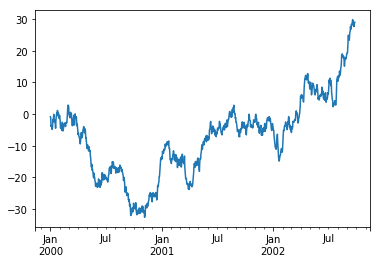

In [103]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()
plt.show()

<Figure size 432x288 with 0 Axes>

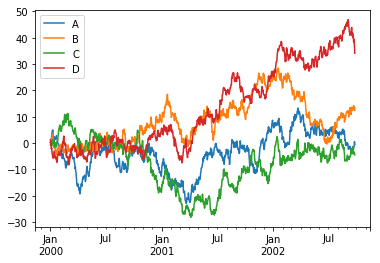

In [104]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')
plt.show()